In [2]:
!pip install neurokit2
!pip install mne
!pip install wfdb

In [11]:
import numpy as np
import pandas as pd
import neurokit2 as nk
import mne
import mne.datasets
import wfdb
import matplotlib.pyplot as plt
import os

Тестируем функции библиотеки для сигналов ECG, PPG, EMG

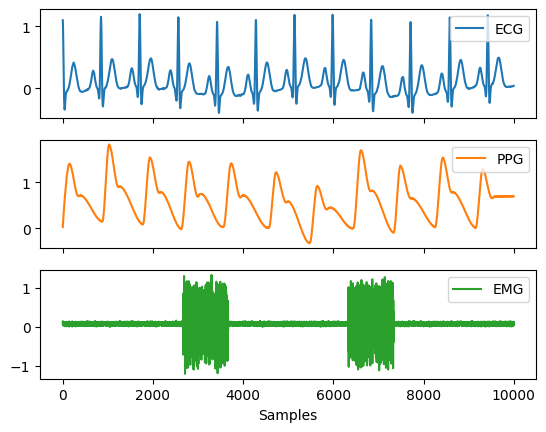

In [7]:
# Generate synthetic signals
ecg = nk.ecg_simulate(duration=10, heart_rate=70)
ppg = nk.ppg_simulate(duration=10, heart_rate=70)
emg = nk.emg_simulate(duration=10, burst_number=2)

# Visualise biosignals
data = pd.DataFrame({"ECG": ecg,
                     "PPG": ppg,
                     "EMG": emg})
nk.signal_plot(data, subplots=True)

Lobachevsky University Electrocardiography Database

LUDB (Lobachevsky University Electrocardiography Database) - это база данных, содержащая записи ЭКГ сигналов.
200 записей - каждая запись длится 10 секунд и содержит данные ЭКГ по 12 отведениям.
Сбор данных - записи были собраны у здоровых добровольцев и пациентов в Нижегородской городской больнице № 5 в период с 2017 по 2018 год. Пациенты имели различные сердечно-сосудистые заболевания, некоторые из них носили кардиостимуляторы.
Аннотации - кардиологи вручную аннотировали границы и пики волн P, T и комплексов QRS для каждой записи.
Диагнозы - каждая запись также содержит аннотацию с соответствующим диагнозом пациента.
Применение базы данных - база данных может использоваться для образовательных целей и для разработки и тестирования алгоритмов, предназначенных для автоматической разметки ЭКГ (обнаружения границ и пиков волн P, T и комплексов QRS).

In [4]:
cd sample_data/ludb

/content/sample_data/ludb


In [33]:
# Путь к папке с данными
data_path = 'data'  # замените на реальный путь

# Загрузка данных из CSV файла
csv_file_path = 'ludb.csv'
df = pd.read_csv(csv_file_path)

# Выбор первых пяти записей
first_five_records = df.iloc[:5]

In [40]:
def processECG(record_name, csv_row):
    record_path = os.path.join(data_path, record_name)
    record = wfdb.rdrecord(record_path)

    # Предобработка
    ecg_signal = record.p_signal[:, 0]  # Загрузка первого канала ЭКГ
    ecg_signal = nk.ecg_clean(ecg_signal, sampling_rate=record.fs)
    signals, info = nk.ecg_process(ecg_signal, sampling_rate=record.fs)

    hrv = nk.hrv_time(signals, sampling_rate=record.fs)
    r_peaks = nk.ecg_findpeaks(ecg_signal, sampling_rate=record.fs)

    # Визуализация сигнала с R-пиками
    plt.figure(figsize=(12, 6))
    plt.plot(ecg_signal, label='Cleaned ECG Signal')
    plt.plot(r_peaks['ECG_R_Peaks'], ecg_signal[r_peaks['ECG_R_Peaks']], 'ro', label='R-peaks')
    plt.legend()
    plt.show()

    # Визуализация пиков P, T волн и комплексов QRS
    nk.events_plot([info['ECG_P_Peaks'], info['ECG_T_Peaks'], info['ECG_R_Peaks']], ecg_signal)
    plt.title(f"ECG Peaks for Record {record_name}")
    plt.show()

    # Сравнение с данными из CSV файла
    print(f"Record ID: {csv_row['ID']}")
    print(f"Sex: {csv_row['Sex']}")
    print(f"Age: {csv_row['Age']}")
    print(f"Rhythms: {csv_row['Rhythms']}")
    print(f"Electric axis of the heart: {csv_row['Electric axis of the heart']}")
    print(f"Conduction abnormalities: {csv_row['Conduction abnormalities']}")
    print(f"Extrasystolies: {csv_row['Extrasystolies']}")
    print(f"Hypertrophies: {csv_row['Hypertrophies']}")
    print(f"Cardiac pacing: {csv_row['Cardiac pacing']}")
    print(f"Ischemia: {csv_row['Ischemia']}")
    print(f"Non-specific repolarization abnormalities: {csv_row['Non-specific repolarization abnormalities']}")
    print(f"Other states: {csv_row['Other states']}")
    print("\n")

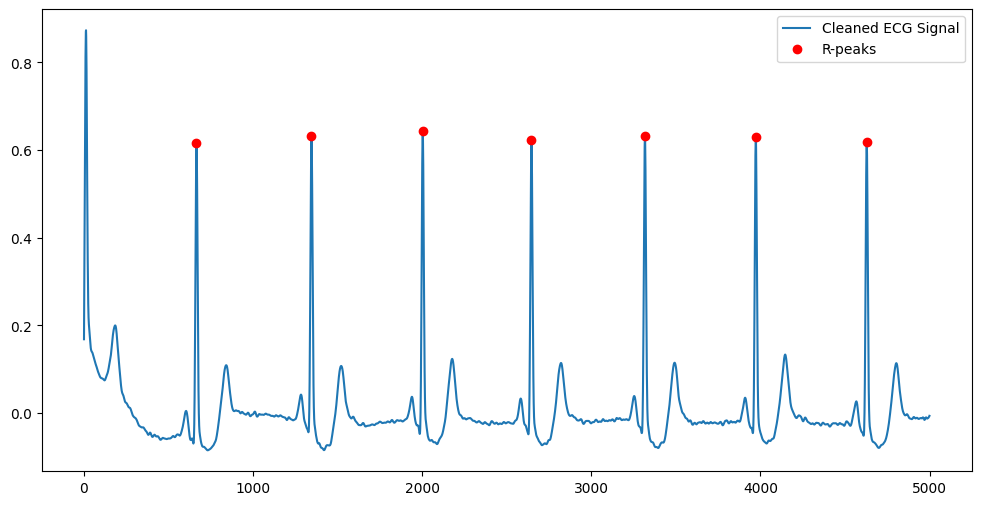

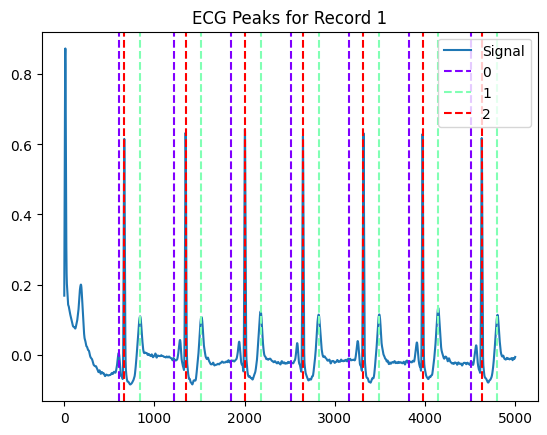

Record ID: 1
Sex: F

Age: 51

Rhythms: Sinus bradycardia
Electric axis of the heart: Electric axis of the heart: left axis deviation
Conduction abnormalities: nan
Extrasystolies: nan
Hypertrophies: Left ventricular overload
Left ventricular hypertrophy
Cardiac pacing: nan
Ischemia: nan
Non-specific repolarization abnormalities: Non-specific repolarization abnormalities: posterior wall
Other states: nan




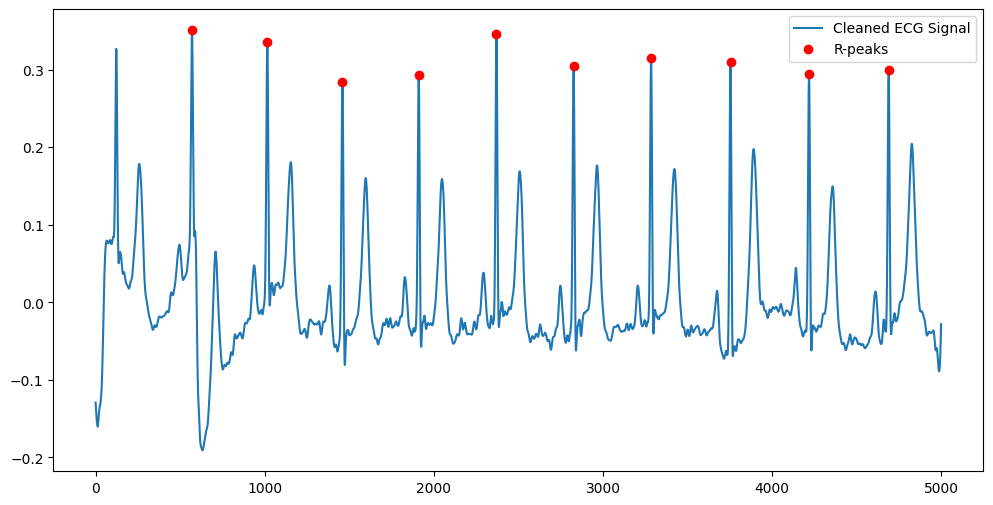

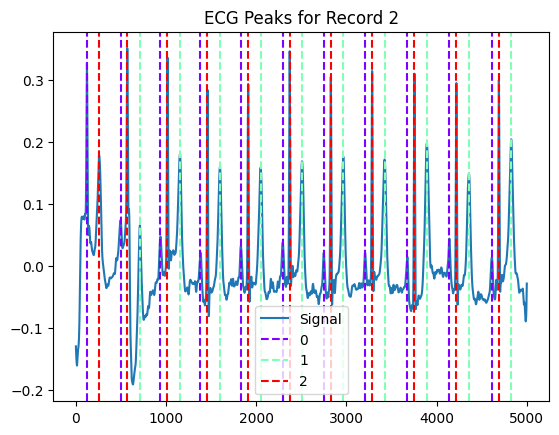

Record ID: 2
Sex: M

Age: 64

Rhythms: Sinus rhythm
Electric axis of the heart: Electric axis of the heart: normal
Conduction abnormalities: nan
Extrasystolies: nan
Hypertrophies: Left atrial hypertrophy
Left ventricular hypertrophy
Cardiac pacing: nan
Ischemia: nan
Non-specific repolarization abnormalities: Non-specific repolarization abnormalities: posterior wall
Other states: nan




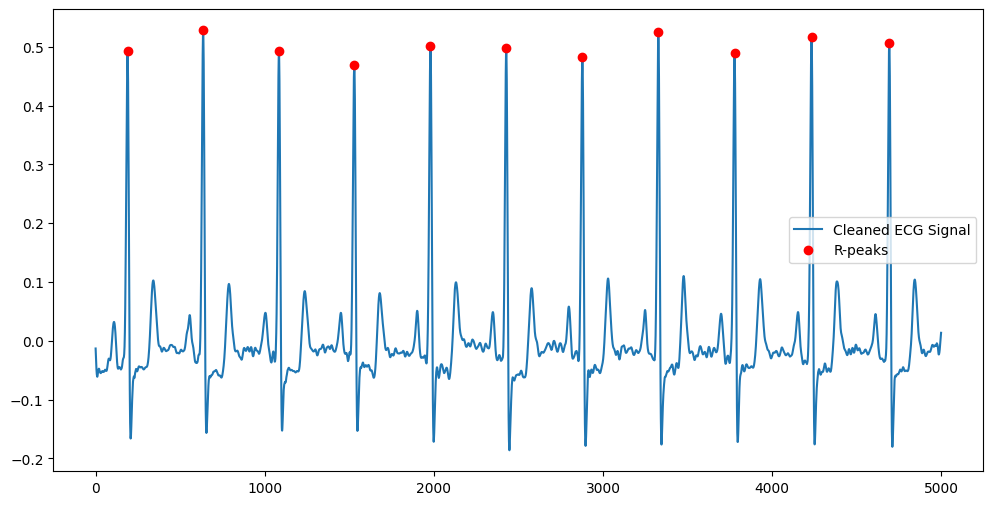

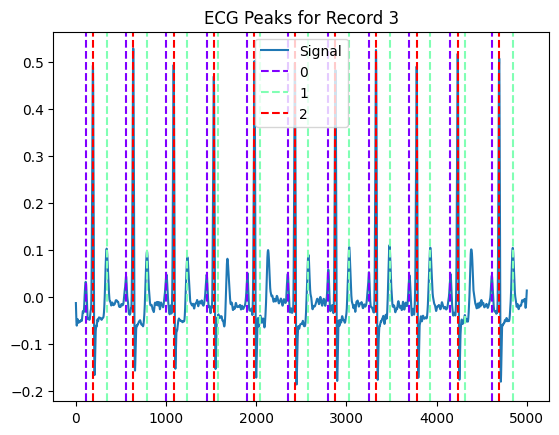

Record ID: 3
Sex: M

Age: 53

Rhythms: Sinus rhythm
Electric axis of the heart: Electric axis of the heart: vertical
Conduction abnormalities: nan
Extrasystolies: nan
Hypertrophies: Left atrial hypertrophy
Left ventricular hypertrophy
Cardiac pacing: nan
Ischemia: Ischemia: inferior wall
Ischemia: lateral wall
Non-specific repolarization abnormalities: nan
Other states: nan




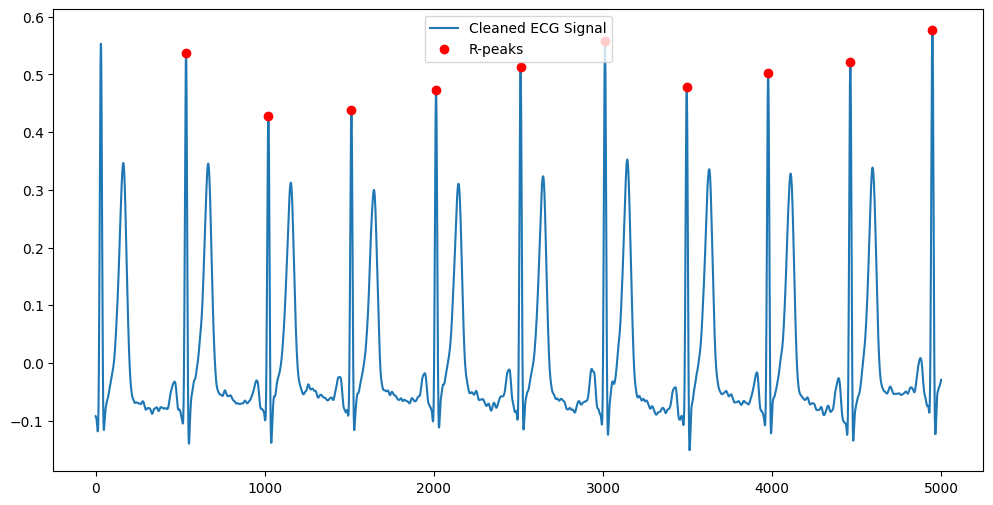

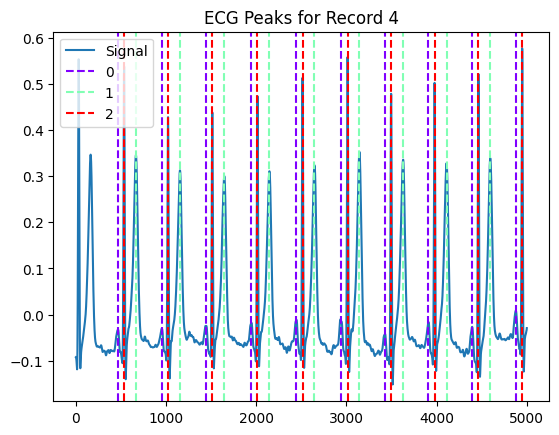

Record ID: 4
Sex: M

Age: 56

Rhythms: Sinus rhythm
Electric axis of the heart: Electric axis of the heart: left axis deviation
Conduction abnormalities: Incomplete right bundle branch block
Extrasystolies: nan
Hypertrophies: Left atrial hypertrophy
Left ventricular hypertrophy
Cardiac pacing: nan
Ischemia: Ischemia: inferior wall
Scar formation: inferior wall
Undefined ischemia/scar/supp.nstemi: inferior wall
Non-specific repolarization abnormalities: nan
Other states: nan




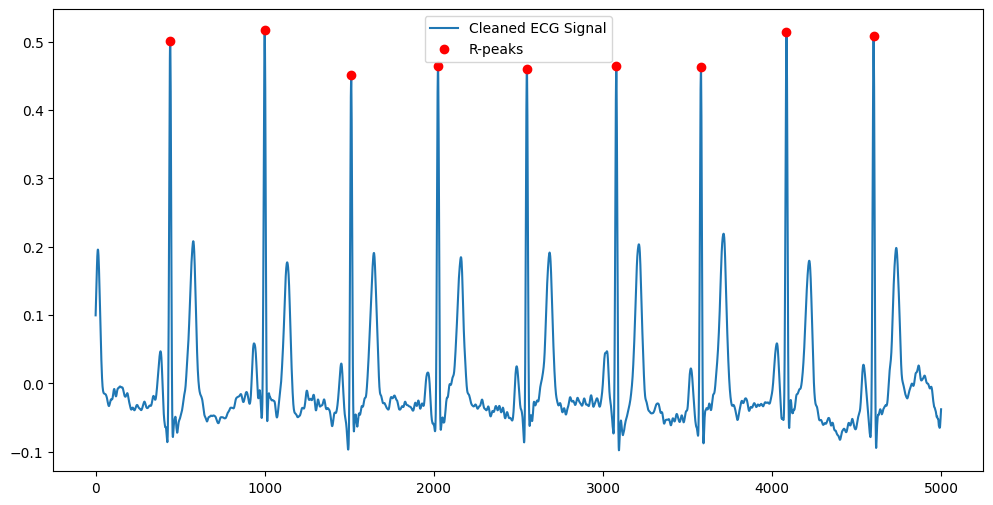

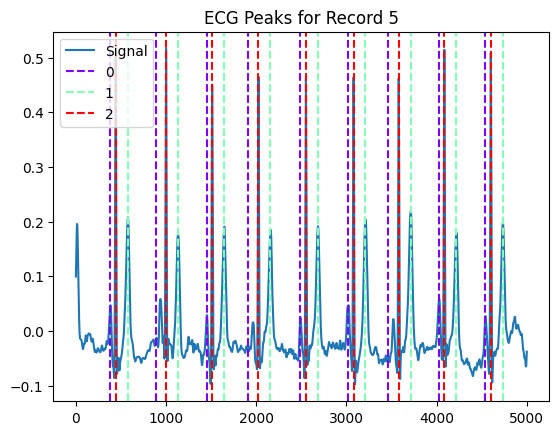

Record ID: 5
Sex: M

Age: 61

Rhythms: Sinus rhythm
Electric axis of the heart: Electric axis of the heart: horizontal
Conduction abnormalities: nan
Extrasystolies: nan
Hypertrophies: Left atrial hypertrophy
Cardiac pacing: nan
Ischemia: nan
Non-specific repolarization abnormalities: Non-specific repolarization abnormalities: inferior wall
Other states: nan




In [41]:
# Загрузка и анализ первых пяти записей
for index, row in first_five_records.iterrows():
    record_name = str(row['ID'])
    processECG(record_name, row)

ФПГ

In [ ]:
# пример из совместной работы с одногруппниками
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1itPDhnaskyq1svAkGEydHfj2LW3b2awr' -O norm.dat
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1B64dtns-9Sk780A0eFFNwL26sen4H2uO' -O 2min.dat
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1KBNQiITmpqprCtuoLmlwR9Bb-rUqobna' -O 5min.dat
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=10HVlSejN-Nh8CDIZpzbdxU24AK8j8pbU' -O 15min.dat


data_rest = pd.read_csv("norm.dat", delimiter='\t', names=['x', 'y'])
data_2min = pd.read_csv("2min.dat", delimiter='\t', names=['x', 'y'])
data_5min = pd.read_csv("5min.dat", delimiter='\t', names=['x', 'y'])
data_15min = pd.read_csv("15min.dat", delimiter='\t', names=['x', 'y'])

dataPPG = [data_rest, data_2min, data_5min, data_15min]
titles = ['rest', '2min activity', '5min activity', '15min activity']


In [89]:
def processPPG(data, title):
    ppg_signal = data['y']

    # Очистка сигнала
    ppg_cleaned = nk.ppg_clean(ppg_signal, sampling_rate=100)

    # Обработка сигнала ФПГ
    signals, info = nk.ppg_process(ppg_cleaned, sampling_rate=100)

    # Визуализация обработанных данных
    plt.figure(figsize=(20, 10))
    nk.ppg_plot(signals)
    plt.title(title)
    plt.show()

    # Извлечение характеристик
    ppg_summary = nk.ppg_analyze(signals, sampling_rate=100)
    print(f"{title} Summary:\n", ppg_summary)

/usr/local/lib/python3.10/dist-packages/neurokit2/ppg/ppg_plot.py:67: NeuroKitWarning: 'info' dict not provided. Some information might be missing. Sampling rate will be set to 1000 Hz.
  warn(


<Figure size 2000x1000 with 0 Axes>

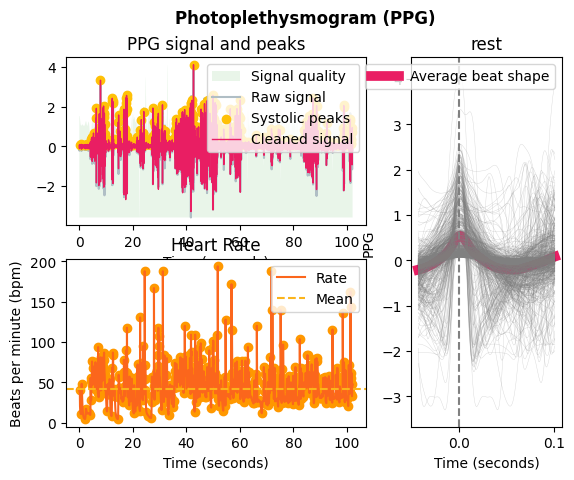

rest Summary:
    PPG_Rate_Mean   HRV_MeanNN     HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  \
0      41.592129  1498.939617  1050.696802  307.293878  901.540266   

   HRV_SDANN2  HRV_SDNNI2  HRV_SDANN5   HRV_SDNNI5    HRV_RMSSD  ...  \
0  200.078844  959.551107  205.018488  1008.930007  1270.819945  ...   

   HRV_SampEn  HRV_ShanEn  HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn  \
0    1.202212    7.350765     0.922298  1.047646   1.325196    1.365391   

     HRV_CD   HRV_HFD   HRV_KFD   HRV_LZC  
0  1.040294  1.940581  2.674093  0.942112  

[1 rows x 92 columns]


/usr/local/lib/python3.10/dist-packages/neurokit2/ppg/ppg_plot.py:67: NeuroKitWarning: 'info' dict not provided. Some information might be missing. Sampling rate will be set to 1000 Hz.
  warn(


<Figure size 2000x1000 with 0 Axes>

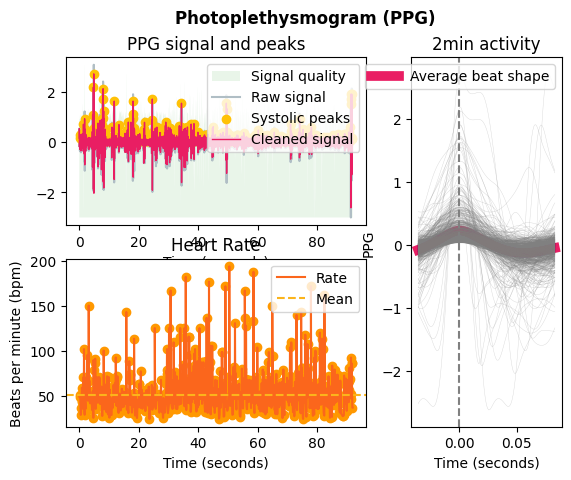

2min activity Summary:
    PPG_Rate_Mean   HRV_MeanNN    HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  \
0      50.422054  1227.322624  410.167437   91.824828  406.125049   60.040016   

   HRV_SDNNI2  HRV_SDANN5  HRV_SDNNI5   HRV_RMSSD  ...  HRV_SampEn  \
0  409.124981   83.598037  406.603958  559.733276  ...    2.005003   

   HRV_ShanEn  HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn    HRV_CD  \
0    7.119953     1.567055  0.870975   1.424209    2.108113  1.897182   

    HRV_HFD  HRV_KFD   HRV_LZC  
0  1.995593   6.0681  1.047774  

[1 rows x 92 columns]


/usr/local/lib/python3.10/dist-packages/neurokit2/ppg/ppg_plot.py:67: NeuroKitWarning: 'info' dict not provided. Some information might be missing. Sampling rate will be set to 1000 Hz.
  warn(


<Figure size 2000x1000 with 0 Axes>

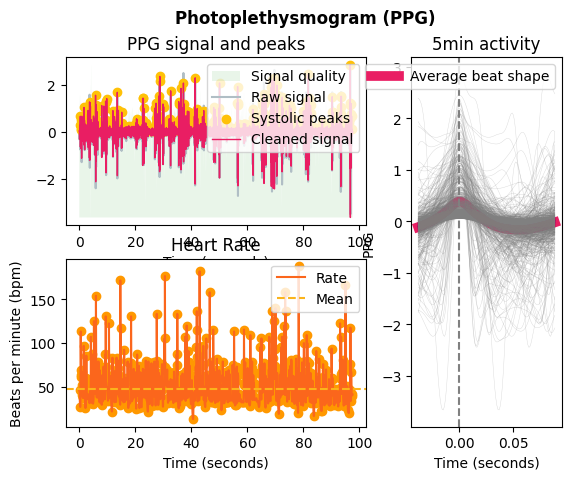

5min activity Summary:
    PPG_Rate_Mean   HRV_MeanNN    HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  \
0      47.543078  1301.338688  481.006347   69.096587  470.987458   57.930655   

   HRV_SDNNI2  HRV_SDANN5  HRV_SDNNI5   HRV_RMSSD  ...  HRV_SampEn  \
0  474.732584   12.690979  478.299121  617.986656  ...    2.048604   

   HRV_ShanEn  HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn  HRV_CD   HRV_HFD  \
0    7.276874     1.547671  0.900493   1.456266     2.09171  1.7872  1.971697   

    HRV_KFD   HRV_LZC  
0  4.191847  1.047774  

[1 rows x 92 columns]


/usr/local/lib/python3.10/dist-packages/neurokit2/ppg/ppg_plot.py:67: NeuroKitWarning: 'info' dict not provided. Some information might be missing. Sampling rate will be set to 1000 Hz.
  warn(


<Figure size 2000x1000 with 0 Axes>

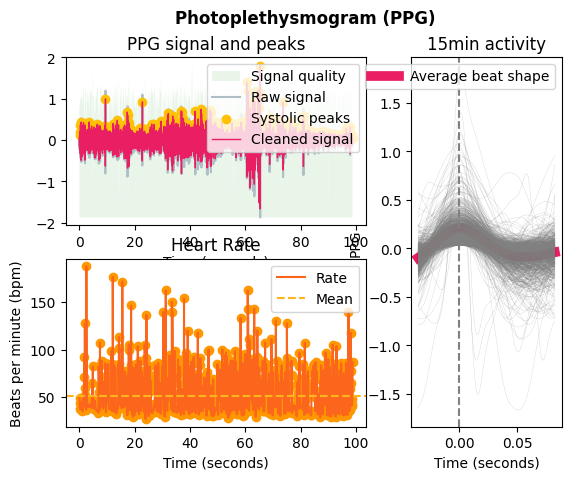

15min activity Summary:
    PPG_Rate_Mean   HRV_MeanNN    HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  \
0      50.823729  1212.739558  412.902591   69.861614  410.387239   50.032703   

   HRV_SDNNI2  HRV_SDANN5  HRV_SDNNI5   HRV_RMSSD  ...  HRV_SampEn  \
0  411.932272   20.029301  409.576043  515.398794  ...    1.595005   

   HRV_ShanEn  HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn    HRV_CD  \
0    7.136203     1.464978  0.805621   1.417878    2.195746  1.799394   

    HRV_HFD   HRV_KFD  HRV_LZC  
0  1.949996  5.802367  1.00965  

[1 rows x 92 columns]


In [94]:
for data, title in zip(dataPPG, titles):
  processPPG(data, title)

EMG

In [95]:
cd ../emg

/content/sample_data/emg



Электромиографическая база данных (EMGDB) представляет собой набор записей электромиографии (ЭМГ), собранных для исследования характеристик ЭМГ сигналов у здоровых добровольцев, а также у пациентов с миопатией и невропатией. Данные предназначены для использования в образовательных целях, а также для разработки и тестирования алгоритмов обработки ЭМГ сигналов (https://physionet.org/content/emgdb/1.0.0/)

Описание данных
База данных включает в себя записи, снятые с различных групп мышц, а также метаданные, описывающие тип пациента (здоровый, миопатия, невропатия) и анатомическое местоположение датчиков. Записи включают в себя файлы с различными расширениями, такими как .dat для данных сигналов, .hea для заголовочных файлов и .txt для дополнительной информации.

In [113]:
data_path = os.getcwd()

In [135]:
# Функция для чтения данных из файлов
def read_emg_data(record_name):
    record_path_dat = os.path.join(data_path, record_name + '.dat')
    record_path_hea = os.path.join(data_path, record_name + '.hea')

    record = wfdb.rdrecord(os.path.join(data_path, record_name))
    signal = record.p_signal[:, 0]  # Первый канал ЭМГ сигнала

    with open(record_path_hea, 'r') as f:
        header = f.readlines()

    return signal, header

signal, header = read_emg_data('emg_myopathy')

signal_healthy = read_emg_data('emg_healthy')
signal_myopathy = read_emg_data('emg_myopathy')
signal_neuropathy = read_emg_data('emg_neuropathy')

(array([-0.0333, -0.035 , -0.035 , ...,  0.005 ,  0.005 ,  0.0083]), ['emg_healthy 1 4000 50860\n', 'emg_healthy.dat 16 10000/mV 16 0 -333 -29438 0 EMG\n', '# <age>: 44 <sex>: M <diagnoses> no history of neuromuscular disease\n', '# EMG from 25mm concentric needle electrode placed in tibialis anterior muscle\n', '# patient dorsiflexed the foot gently against resistance, then relaxed\n']) (array([-0.005, -0.01 , -0.005, ...,  0.155,  0.12 ,  0.115]), ['emg_myopathy 1 4000 110337\n', 'emg_myopathy.dat 16 10000/mv 16 0 -50 -6380 0 EMG\n', '# <age>: 57 <sex>: M\n', '# <diagnoses>: myopathy due to long history of polymostis\n', '# <medications>: steroids, low-dose methotrexate\n', '# EMG from 25mm concentric needle electrode placed in tibialis anterior muscle\n', '# patient dorsiflexed the foot gently against resistance, then relaxed\n']) (array([0.09  , 0.0767, 0.0767, ..., 0.0633, 0.0633, 0.0283]), ['emg_neuropathy 1 4000 147858\n', 'emg_neuropathy.dat 16 10000/mV 16 0 900 16686 0 EMG\n',

Здесь сравним как выводит MPL и реализованный вывод в библиотеке Neurokit2

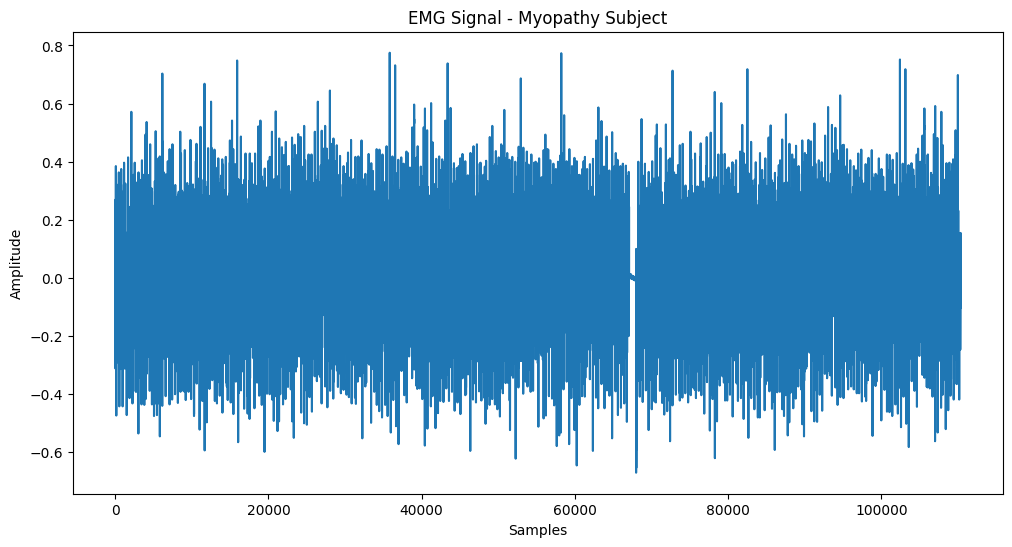

/usr/local/lib/python3.10/dist-packages/neurokit2/emg/emg_plot.py:55: NeuroKitWarning: 'info' dict not provided. Some information might be missing. Sampling rate will be set to 1000 Hz.
  warn(


<Figure size 1200x600 with 0 Axes>

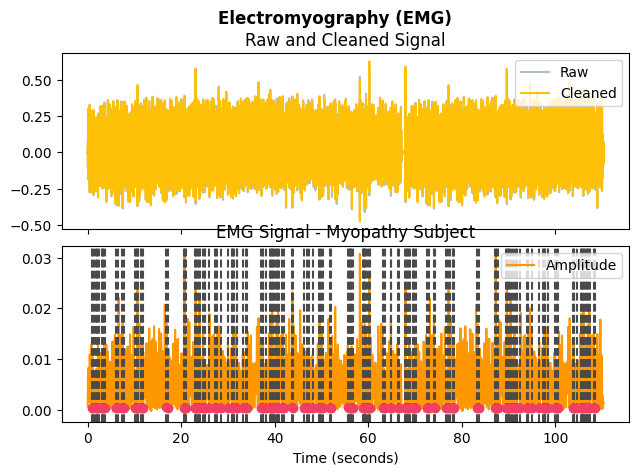

,EMG_Raw,EMG_Clean,EMG_Amplitude,EMG_Activity,EMG_Onsets,EMG_Offsets
0,-0.000081,-0.000012,0.000689,0.0,0,0
1,-0.003961,-0.003655,0.000765,0.0,0,0
2,0.001722,0.002121,0.000843,0.0,0,0
3,-0.003351,-0.003053,0.000925,0.0,0,0
4,-0.000981,-0.000927,0.001010,0.0,0,0
...,...,...,...,...,...,...
110332,-0.003213,-0.009262,0.001505,0.0,0,0
110333,0.023409,0.014868,0.001501,0.0,0,0
110334,0.021205,0.013159,0.001498,0.0,0,0
110335,-0.007296,-0.012013,0.001495,0.0,0,0


In [139]:
# Функция для визуализации сигнала
def plot_emg_signal(signal, title):
    plt.figure(figsize=(12, 6))
    plt.plot(signal)
    plt.title(title)
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.show()

def process_and_plot_emg(signal, title):
    # Очистка сигнала
    cleaned_signal = nk.emg_clean(signal, sampling_rate=1000)
    emg_signals, info = nk.emg_process(cleaned_signal, sampling_rate=1000)
    # Визуализация сигнала
    plt.figure(figsize=(12, 6))
    nk.emg_plot(emg_signals)
    plt.title(title)
    plt.show()
    return emg_signals

# Визуализация сигнала
plot_emg_signal(signal, 'EMG Signal - Myopathy Subject')
process_and_plot_emg(signal, 'EMG Signal - Myopathy Subject')


In [ ]:
Тем самым можно легко и верхнеуровнево обрабатывать сигналы, а еще легче их визуализировать

In [86]:
cd ..

/content/sample_data/ludb
